## The Normal Equation

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

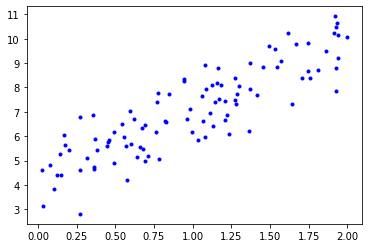

In [7]:
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")

In [8]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
theta_best

array([[4.27796473],
       [2.79957438]])

In [11]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 -1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.27796473],
       [9.87711349]])

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_


(array([4.27796473]), array([[2.79957438]]))

In [14]:
lin_reg.predict(X_new)

array([[4.27796473],
       [9.87711349]])

Singular Value Decomposition (SVD)

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.27796473],
       [2.79957438]])

In [16]:
np.linalg.pinv(X_b).dot(y)

array([[4.27796473],
       [2.79957438]])

Gradient Descent

In [17]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [18]:
theta

array([[4.27796473],
       [2.79957438]])

### Stochastic Gradient Descent using a simple learning schedule

Stochastic == Random
learning schedule determines the learning rate at each iteration 


In [19]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta  = theta - eta * gradients

In [20]:
theta

array([[4.30245245],
       [2.81854533]])

In [21]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.25063024]), array([2.82963747]))

In [ ]:
# page 127 
# read in